<a href="https://colab.research.google.com/github/saadmarwan16/linear_regression_exercises/blob/main/antelope_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import files
# files.upload()

In [2]:
import numpy as np
from pandas import read_excel
import matplotlib.pyplot as plt

In [3]:
df = read_excel('mlr01.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      8 non-null      float64
 1   X2      8 non-null      float64
 2   X3      8 non-null      float64
 3   X4      8 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 384.0 bytes


In [4]:
df.head(8)

,X1,X2,X3,X4
0,2.9,9.2,13.2,2
1,2.4,8.7,11.5,3
2,2.0,7.2,10.8,4
3,2.3,8.5,12.3,2
4,3.2,9.6,12.6,3
5,1.9,6.8,10.6,5
6,3.4,9.7,14.1,1
7,2.1,7.9,11.2,3


In [5]:
df.corr()

,X1,X2,X3,X4
X1,1.000000,0.938797,0.923911,-0.738843
X2,0.938797,1.000000,0.902582,-0.836397
X3,0.923911,0.902582,1.000000,-0.900861
X4,-0.738843,-0.836397,-0.900861,1.000000


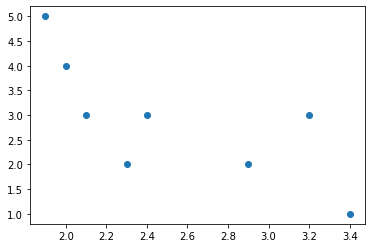

In [6]:
plt.scatter(df['X1'], df['X4']);

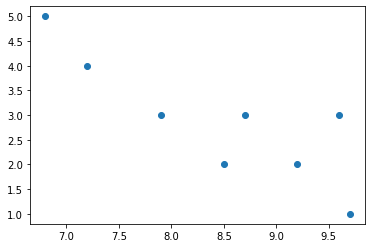

In [7]:
plt.scatter(df['X2'], df['X4']);

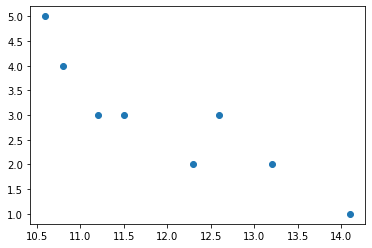

In [8]:
plt.scatter(df['X3'], df['X4']);

In [9]:
X = df[['X1', 'X2', 'X3']].values
X1 = df['X1'].values
X2 = df['X2'].values
X3 = df['X3'].values
Y = df['X4'].values

In [10]:
def fit(X, Y):
    denominator = X.dot(X) - X.mean() * X.sum()
    a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
    b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

    return a*X + b

In [11]:
Y1_hat = fit(X1, Y)
Y2_hat = fit(X2, Y)
Y3_hat = fit(X3, Y)

In [12]:
def get_r2(Y, Y_hat):
    d1 = Y - Y_hat
    d2 = Y - Y.mean()

    return 1 - d1.dot(d1) / d2.dot(d2)

In [13]:
print(f"The r_squared value for X1 is: {get_r2(Y, Y1_hat)}")
print(f"The r_squared value for X2 is: {get_r2(Y, Y2_hat)}")
print(f"The r_squared value for X3 is: {get_r2(Y, Y3_hat)}")

The r_squared value for X1 is: 0.5458885740725541
The r_squared value for X2 is: 0.6995600674280821
The r_squared value for X3 is: 0.8115501225791628


In [14]:
N = X.shape[0]
ones = np.array([np.ones(N)])
Xb = np.concatenate((ones.T, X), axis=1)

In [15]:
def fit_multi(Xb, Y):
    return np.linalg.solve(Xb.T.dot(Xb), Xb.T.dot(Y))

In [16]:
w = fit_multi(Xb, Y)

In [17]:
def get_multi_r2(w, Xb, Y):
    Y_hat = Xb.dot(w)
    d1 = Y - Y_hat
    d2 = Y - Y.mean()

    return 1 - d1.dot(d1) / d2.dot(d2)

In [18]:
print(f"The overall r_squared value is: {get_multi_r2(w, Xb, Y)}")

The overall r_squared value is: 0.945189297121372
